# AI Saturdays Training Exercise - Bank Classifier
Las campañas de marketing del banco dependen de los datos de los clientes. El tamaño de estos datos es tan grande que es imposible que un analista de datos extraiga buena información que pueda ayudar en el proceso de toma de decisiones.

Los modelos de aprendizaje automático están ayudando completamente en el desempeño de estas campañas. 

## Dataset

Este conjunto de datos está relacionado con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder a si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito.

El objetivo es predecir si el cliente se suscribirá (sí/no) a un depósito a plazo, construyendo un modelo de clasificación utilizando árboles de decisión.

## Summay of data
### Categorical Variables :
job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student

marital : married, single, divorced

education: secondary, tertiary, primary, unknown

default : yes, no

housing : yes, no

loan : yes, no

deposit : yes, no (Dependent Variable)

contact : unknown, cellular, telephone

month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

poutcome: unknown, other, failure, success


### Numerical Variables:
age

balance

day

duration

campaign -> numero de veces que se le ha contactado en esta campaña

pdays -> dias que han pasado desde el último contacto, -1 si no se le ha contactado

previous -> numero de veces que se le ha contactado previas a la campaña

In [198]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [199]:
# Crear dataframe a partir de .csv
df = pd.read_csv('bank.csv')

# Mostrar número de filas y columnas del dataframe
print("Filas: " + str(df.shape[0]) + " Cols: " + str(df.shape[1]))

# Mostrar las primeras 10 filas (TO-DO)
df.head(10)


Filas: 11162 Cols: 17


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [200]:
# Hallar número de valores únicos en cada columna (TO-DO)
for col in df:
  print(len(df[col].unique()))

76
12
3
4
2
3805
2
2
3
31
12
1428
36
472
34
4
2


In [201]:
# Comprobar la existencia de valores nulos en el dataset
pd.isnull(df).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [202]:
# Mostrar información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [203]:
# Descripción analítica básica del dataframe
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


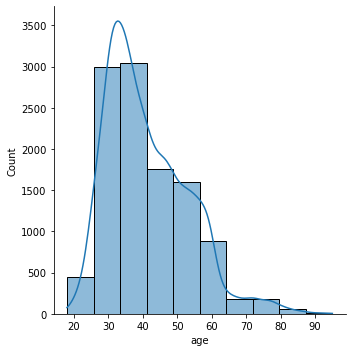

In [204]:
# Distribución de la Edad
sns.displot(df['age'],bins=10,kde=True)

### Convertir datos categóricos si hay y hacer una copia de los datos


In [207]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [208]:
# Hacer una copia primero!!
bank_data = df.copy()
columnas_categoricas = ['job','marital','education','default','housing','loan','deposit','contact','month','poutcome']
for x in columnas_categoricas :
    bank_data[x] = pd.Categorical(bank_data[x])
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        11162 non-null  int64   
 1   job        11162 non-null  category
 2   marital    11162 non-null  category
 3   education  11162 non-null  category
 4   default    11162 non-null  category
 5   balance    11162 non-null  int64   
 6   housing    11162 non-null  category
 7   loan       11162 non-null  category
 8   contact    11162 non-null  category
 9   day        11162 non-null  int64   
 10  month      11162 non-null  category
 11  duration   11162 non-null  int64   
 12  campaign   11162 non-null  int64   
 13  pdays      11162 non-null  int64   
 14  previous   11162 non-null  int64   
 15  poutcome   11162 non-null  category
 16  deposit    11162 non-null  category
dtypes: category(10), int64(7)
memory usage: 721.5 KB


#### Job

In [209]:
# Explorar Personas que hicieron un depósito Vs Categoría de trabajo
jobs = bank_data["job"].unique()
for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

admin.          :   631
technician      :   840
services        :   369
management      :  1301
retired         :   516
blue-collar     :   708
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34
self-employed   :   187
student         :   269


In [210]:
# Imprime los diferentes tipos de categorías de trabajo y cuántos elementos hay en cada uno (investiga value_counts)
bank_data.job.value_counts()


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [211]:
# Combinar trabajos similares en categorías. Para ello investigad la función replace
# ['management', 'admin.'] ->  'white-collar'
# ['services','housemaid'] -> 'pink-collar'
# ['retired', 'student', 'unemployed', 'unknown'] ->  'other'
bank_data['job'] = bank_data['job'].replace(to_replace = ['management','admin.'], value = 'white-collar')
bank_data['job'] = bank_data['job'].replace(to_replace = ['services','housemaid'], value = 'pink-collar')
bank_data['job'] = bank_data['job'].replace(to_replace = ['retired','student','unemployed','unknown'], value = 'other')

In [212]:
# Volved a hacer el conteo de valores para ver como ha quedado la información
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

#### poutcome

In [213]:
# Exploremos los valores que tiene
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [214]:
# Combina "unknown" y "other" ya que "other" no es realmente compatible con el "success" o el "failure". Reutiliza la función replace
bank_data['poutcome'] = bank_data['poutcome'].replace(to_replace = 'other', value = 'unknown') #Pongo los 'other' como 'unknown' 
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

#### contact

In [215]:
# Drop 'contact' ya que no nos aporta información
bank_data.drop ('contact',axis=1,inplace=True)

#### default

In [216]:
# Valores de "default" : Cambiar a  yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#### housing, loan, deposit

Ahora repetid lo mismo con estas variables!


In [218]:
# values for "housing", "loan", "deposit" : yes/no
variables = ['housing','loan','deposit']
newcolumn = ''
for v in variables :
    newcolumn = v + "_cat"
    bank_data [newcolumn] = bank_data [v].map( {'yes':1, 'no':0})
    bank_data.drop(v,axis = 1, inplace = True)


In [220]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          11162 non-null  int64   
 1   job          11162 non-null  category
 2   marital      11162 non-null  category
 3   education    11162 non-null  category
 4   balance      11162 non-null  int64   
 5   day          11162 non-null  int64   
 6   month        11162 non-null  category
 7   duration     11162 non-null  int64   
 8   campaign     11162 non-null  int64   
 9   pdays        11162 non-null  int64   
 10  previous     11162 non-null  int64   
 11  poutcome     11162 non-null  category
 12  default_cat  11162 non-null  category
 13  housing_cat  11162 non-null  category
 14  loan_cat     11162 non-null  category
 15  deposit_cat  11162 non-null  category
dtypes: category(9), int64(7)
memory usage: 710.3 KB


In [222]:
# values for "loan" : yes/no
print ("Done in previous step")

Done in previous step


In [223]:
# values for "deposit" : yes/no
print("Done in previous step")

Done in previous step


In [224]:
# pdays: número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior
# -1 significa que el cliente no fue contactado previamente

print("Customers that have not been contacted before:", len(bank_data[bank_data.pdays==-1]))
print("Maximum values on padys    :", bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [225]:
# sustituye el valor -1 de pdays por un valor grande i.e. 10000 para que refleje que hace mucho que no se le ha contactado (similar a no haberse contatado nunca)

bank_data['pdays'] = df ['pdays']
bank_data['pdays'] = bank_data ['pdays'].replace(to_replace = -1, value = 10000)

In [226]:
# Cread una nueva columna que contenga recent_pdays, queriendo que reefleje aquellos que son recientes como los valores mas grandes y los que nunca se les ha contactado
# los valores más pequeños (siempre positivos). Para esto, haced el inverso del valor de pdays. Una vez hecho, eliminad pdays
# Create a new column: recent_pdays 
bank_data ['recent_pdays'] = 1 / bank_data ['pdays']


In [192]:
bank_data.drop ('pdays',axis=1,inplace=True)

In [227]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           11162 non-null  int64   
 1   job           11162 non-null  category
 2   marital       11162 non-null  category
 3   education     11162 non-null  category
 4   balance       11162 non-null  int64   
 5   day           11162 non-null  int64   
 6   month         11162 non-null  category
 7   duration      11162 non-null  int64   
 8   campaign      11162 non-null  int64   
 9   pdays         11162 non-null  int64   
 10  previous      11162 non-null  int64   
 11  poutcome      11162 non-null  category
 12  default_cat   11162 non-null  category
 13  housing_cat   11162 non-null  category
 14  loan_cat      11162 non-null  category
 15  deposit_cat   11162 non-null  category
 16  recent_pdays  11162 non-null  float64 
dtypes: category(9), float64(1), int64(7)
memory usage:

### Convert to dummy values

In [228]:
# Convertid las variables a dummies: Es decir, para que sea tratable como vectores, es decir, números, requerimos cambiar las variables categóricas a numéricas.
# Para ello, lo que se hace es, para cada variable categórica, sustituirla por tantas variables como  valores tenga la columna, que contengan 1 si esa fila tenia ese valor y 0 si no
# investiga get_dummies
nuevas_columnas_categoricas = ['job','marital','education','month','poutcome','default_cat','housing_cat','loan_cat','deposit_cat']
bank_with_dummies = pd.get_dummies(bank_data, columns=nuevas_columnas_categoricas,drop_first=True)

In [229]:
bank_with_dummies.shape


(11162, 36)

In [234]:
bank_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  int64  
 1   balance              11162 non-null  int64  
 2   day                  11162 non-null  int64  
 3   duration             11162 non-null  int64  
 4   campaign             11162 non-null  int64  
 5   pdays                11162 non-null  int64  
 6   previous             11162 non-null  int64  
 7   recent_pdays         11162 non-null  float64
 8   job_entrepreneur     11162 non-null  uint8  
 9   job_white-collar     11162 non-null  uint8  
 10  job_other            11162 non-null  uint8  
 11  job_self-employed    11162 non-null  uint8  
 12  job_pink-collar      11162 non-null  uint8  
 13  job_technician       11162 non-null  uint8  
 14  marital_married      11162 non-null  uint8  
 15  marital_single       11162 non-null 

In [230]:
bank_with_dummies.describe()


,age,balance,day,duration,campaign,pdays,previous,recent_pdays,job_entrepreneur,job_white-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown,default_cat_1,housing_cat_1,loan_cat_1,deposit_cat_1
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,...,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,7509.521054,0.832557,0.003124,0.029385,0.349400,...,0.253001,0.084483,0.035119,0.028579,0.095951,0.794033,0.015051,0.473123,0.130801,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,4265.868523,2.292007,0.030686,0.168892,0.476802,...,0.434751,0.278123,0.184089,0.166628,0.294537,0.404424,0.121761,0.499299,0.337198,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,521.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,10000.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,10000.000000,1.000000,0.001919,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mi interpretación es que el saldo de las cuentas crece hasta los 35 años, se mantiene pero con tendencia descendente hasta los 60 y baja a partir de los 60
También intepreto que existen algunos puntos aislados que presentan valores muy altos y muy fuera de la tendencia.


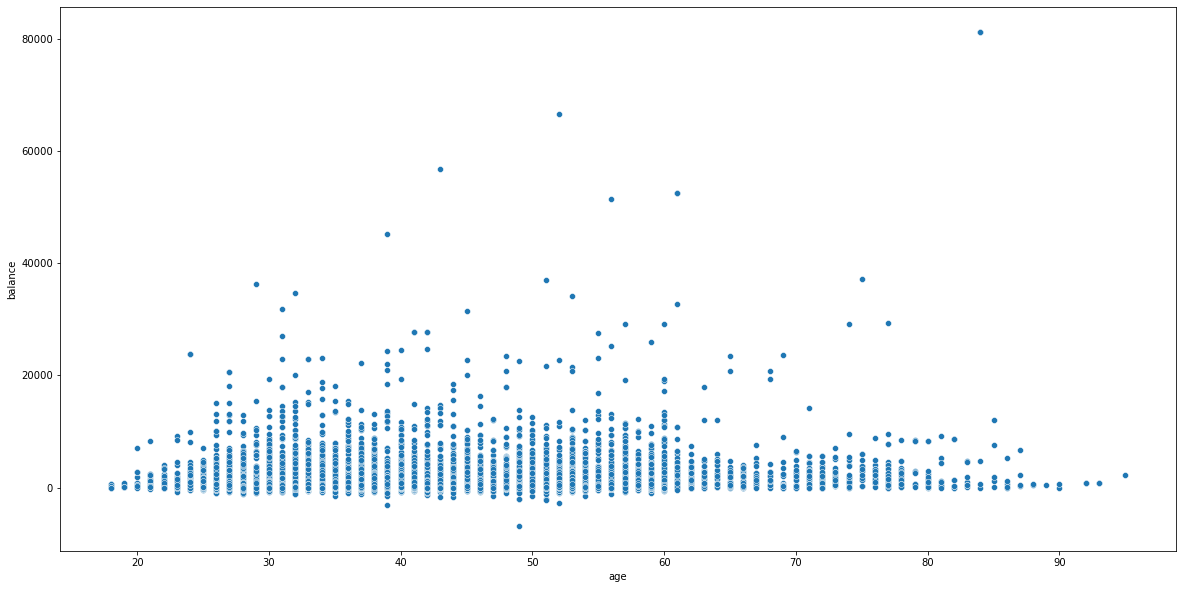

In [235]:
# Scatterplot con la edad y el dinero que hay en la cuenta (balance). Puedes hacerlo con pandas y su función plot o con scatterplot de seaborn
plt.figure(figsize = (20,10))
sns.scatterplot(data=bank_with_dummies,x='age',y='balance')

# ¿Qué interpretas?
print('Mi interpretación es que el saldo de las cuentas crece hasta los 35 años, se mantiene pero con tendencia descendente hasta los 60 y baja a partir de los 60')
print('También intepreto que existen algunos puntos aislados que presentan valores muy altos y muy fuera de la tendencia.')

<AxesSubplot:xlabel='poutcome_success', ylabel='Count'>

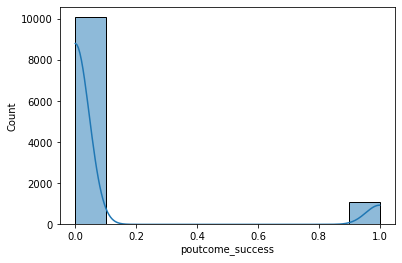

In [236]:
# Histograma con la variable poutcome_success
sns.histplot(data=bank_with_dummies['poutcome_success'],bins=10,kde=True)


In [237]:
# Personas que se inscriben en un depósito a plazo
bank_with_dummies[bank_data.deposit_cat == 1].describe()


,age,balance,day,duration,campaign,pdays,previous,recent_pdays,job_entrepreneur,job_white-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_success,poutcome_unknown,default_cat_1,housing_cat_1,loan_cat_1,deposit_cat_1
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,1804.267915,15.158253,537.294574,2.141047,6467.527699,1.170354,0.004238,0.023256,0.365286,...,0.174891,0.076196,0.061070,0.050860,0.184912,0.698242,0.009832,0.365854,0.091511,1.0
std,13.497781,3501.104777,8.501875,392.525262,1.921826,4709.136115,2.553272,0.035686,0.150729,0.481556,...,0.379910,0.265336,0.239482,0.219733,0.388263,0.459064,0.098676,0.481714,0.288361,0.0
min,18.000000,-3058.000000,1.000000,8.000000,1.000000,1.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,31.000000,210.000000,8.000000,244.000000,1.000000,195.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38.000000,733.000000,15.000000,426.000000,2.000000,10000.000000,0.000000,0.000100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0
75%,50.000000,2159.000000,22.000000,725.000000,3.000000,10000.000000,1.000000,0.005128,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,95.000000,81204.000000,31.000000,3881.000000,32.000000,10000.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


<AxesSubplot:xlabel='job', ylabel='balance'>

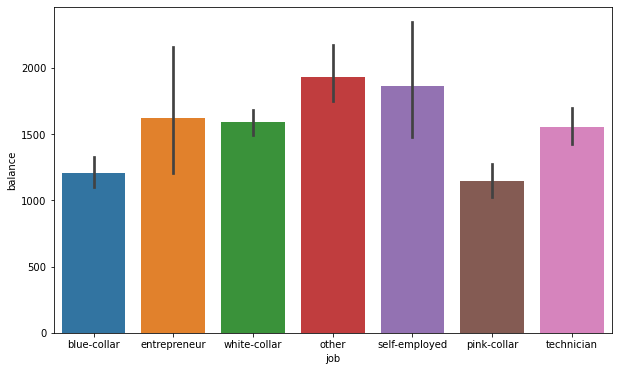

In [238]:
# Diagrama de barras mostrando el valor de desposite separado por trabajo. Investigad barplot de seaborn
plt.figure(figsize = (10,6))
sns.barplot(data=bank_data,x='job',y='balance')


### Establecer las relaciones entre las features


<AxesSubplot:>

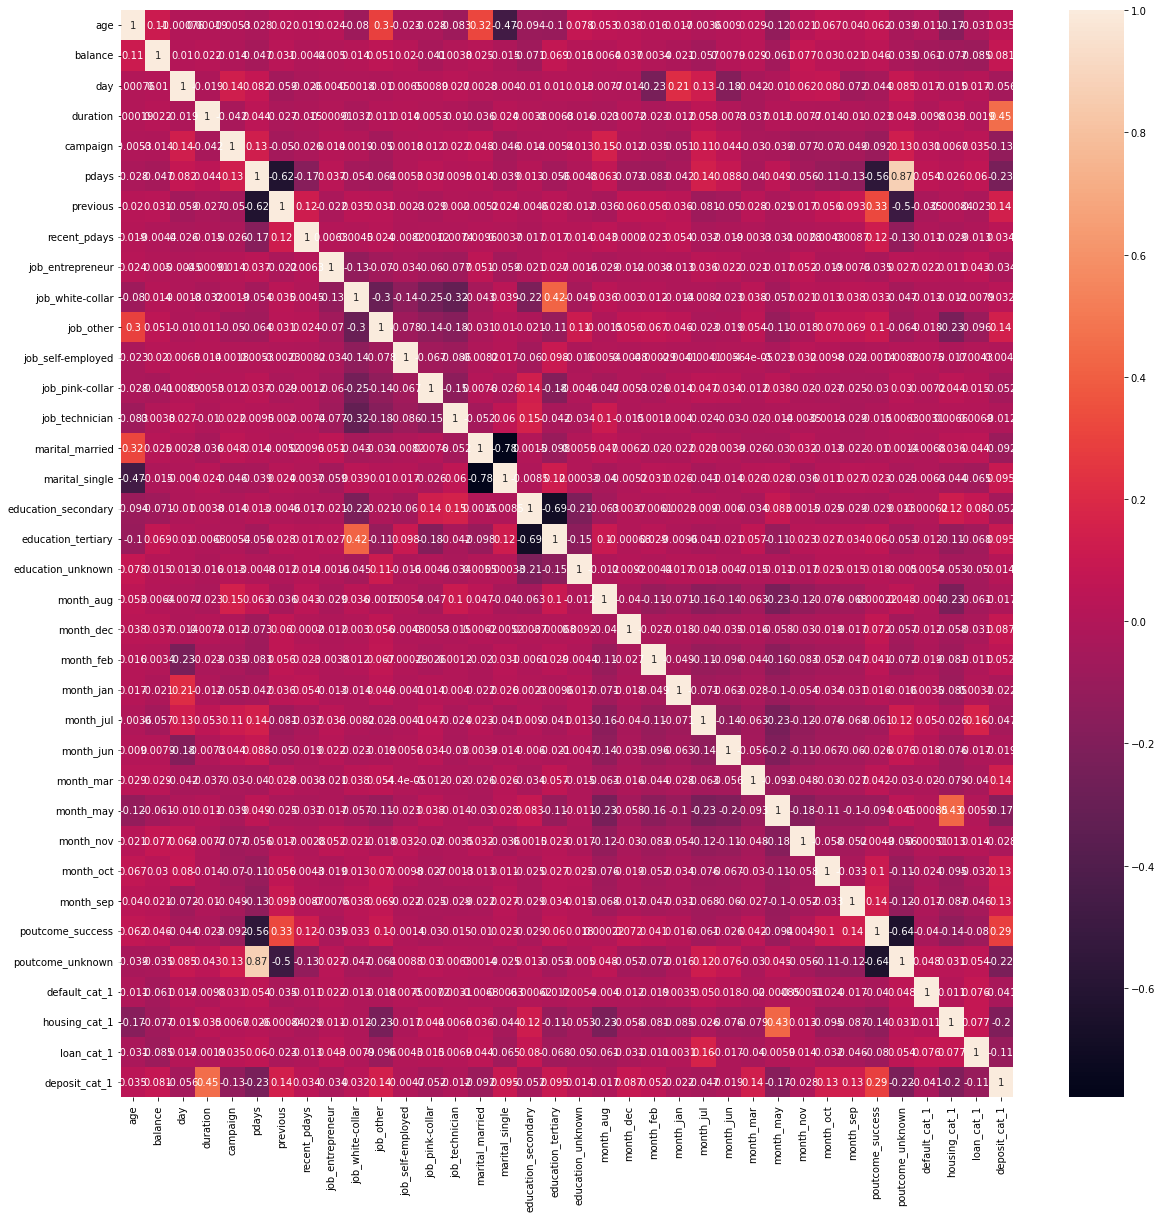

In [239]:
# Mostrar matriz de correlación de variables
# Pista: Explora las funciones corr de pandas y heatmap de seaborn
bank_corr = bank_with_dummies.corr()
plt.figure(figsize = (20,20))
sns.heatmap(bank_corr,annot=True)

In [240]:
# Mostrar correlaciones como una función discreta entre las diferentes variables con una matriz
# útil para apreciar relaciones lineales

# Pista: explore pd.plotting.scatter_matrix
pd.plotting.scatter_matrix(bank_with_dummies, figsize = (100, 100));

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021E41DA38B0> (for post_execute):


KeyboardInterrupt: 

In [243]:
# Partir el test en cierta proporción (¡experimentar!) Importa la libreria sklearn y utiliza train test split ;)
import sklearn as sk
#Separamos la variable a calcular (deposit_cat) y la dejamos en un dataframe llamado label 
label = bank_with_dummies['deposit_cat_1']
#Generamos un nuevo dataset sin la columna a calcular deposit_cat
bank_nolabel = bank_with_dummies.drop ('deposit_cat_1',axis=1)
#Generamos los nuevos dataset de train y test con la función train_test_split. Usamos % de 80 -20 y random_state = 42
data_train, data_test, label_train, label_test = train_test_split(bank_nolabel,label,test_size = 0.2,random_state = 42)


In [244]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 3955 to 7270
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8929 non-null   int64  
 1   balance              8929 non-null   int64  
 2   day                  8929 non-null   int64  
 3   duration             8929 non-null   int64  
 4   campaign             8929 non-null   int64  
 5   pdays                8929 non-null   int64  
 6   previous             8929 non-null   int64  
 7   recent_pdays         8929 non-null   float64
 8   job_entrepreneur     8929 non-null   uint8  
 9   job_white-collar     8929 non-null   uint8  
 10  job_other            8929 non-null   uint8  
 11  job_self-employed    8929 non-null   uint8  
 12  job_pink-collar      8929 non-null   uint8  
 13  job_technician       8929 non-null   uint8  
 14  marital_married      8929 non-null   uint8  
 15  marital_single       8929 non-null 

In [247]:
# Definir un clasificador
from sklearn.neighbors import KNeighborsClassifier

k = 9
neigh = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador con el dataset de train
neigh.fit(data_train, label_train)

# Predecir valores para las variables independientes de test
print(neigh.predict(data_test))

# Calcular la precisión
neigh.score(data_test, label_test)



[0 1 1 ... 0 1 1]


0.7519032691446484